In [1]:
library(dplyr)
library(Hmisc)
library(MESS)
library(data.table)

## change the size of the graphs
options(repr.plot.width = 3, repr.plot.height = 3)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'Hmisc' was built under R version 3.5.2"Loading required package: lattice
Loading required package: survival
Loading required package: Formula
Loading required package: ggplot2

Attaching package: 'Hmisc'

The following objects are masked from 'package:dplyr':

    src, summarize

The following objects are masked from 'package:base':

    format.pval, units

Loading required package: geepack
Loading required package: geeM
Loading required package: Matrix

Attaching package: 'data.table'

The following objects are masked from 'package:dplyr':

    between, first, last



In [2]:
ffWNV2 <- read.csv(file="C:/Users/Chen/Project/data/ffWNV2.csv")
dim(ffWNV2)

[1] 4616   72

In [3]:
str(ffWNV2)

'data.frame':	4616 obs. of  72 variables:
 $ ID                    : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Date                  : Factor w/ 95 levels "2007-05-29","2007-06-05",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Month_Yr              : Factor w/ 20 levels "2007-05","2007-06",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Address               : Factor w/ 138 levels "1000 East 67th Street, Chicago, IL 60637, USA",..: 6 8 10 14 16 19 26 28 29 32 ...
 $ Block                 : int  11 11 11 15 15 17 21 22 22 22 ...
 $ Latitude              : num  41.9 41.9 41.9 41.9 41.9 ...
 $ Longitude             : num  -87.7 -87.6 -87.7 -87.8 -87.7 ...
 $ Street                : Factor w/ 128 levels "  W ARMITAGE AVENUE",..: 124 75 108 27 128 103 42 18 88 102 ...
 $ CULEX_ERRATICUS       : int  0 0 0 0 0 0 0 0 0 0 ...
 $ CULEX_PIPIENS         : int  0 0 0 0 0 0 0 0 0 1 ...
 $ CULEX_PIPIENS_RESTUANS: int  1 0 0 0 0 0 1 2 1 0 ...
 $ CULEX_RESTUANS        : int  2 1 1 1 2 3 0 3 1 5 ...
 $ CULEX_SALINARIUS      : int  0 0 0 0 0 0

In [24]:
#numff<-ffWNV2

In [25]:
#numff$Month_Yr<-NULL
#numff$Address<-NULL
#numff$Street<-NULL
#numff$SnowFall<-NULL
#numff$Date<-NULL

In [4]:
#str(numff)

In [30]:
#var1 <- c("Block","Trap","Latitude","Longitude","CULEX_ERRATICUS","CULEX_PIPIENS","CULEX_PIPIENS_RESTUANS","CULEX_RESTUANS","CULEX_SALINARIUS","CULEX_TARSALIS","CULEX_TERRITANS","Month","ParasiticIn.", "Influenza.", "Spray","WnvPresent")


In [5]:
describe(ffWNV2)

ffWNV2 

 67  Variables      4616  Observations
--------------------------------------------------------------------------------
Date 
       n  missing distinct 
    4616        0       95 

lowest : 01/08/2007 01/08/2013 01/09/2011 01/10/2009 02/06/2009
highest: 29/07/2011 29/08/2013 30/06/2011 30/09/2011 31/07/2009
--------------------------------------------------------------------------------
ID 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
    4616        0     4616        1     2308     1539    231.8    462.5 
     .25      .50      .75      .90      .95 
  1154.8   2308.5   3462.2   4154.5   4385.2 

lowest :    1    2    3    4    5, highest: 4612 4613 4614 4615 4616
--------------------------------------------------------------------------------
Month_Yr 
       n  missing distinct 
    4616        0       20 

2007-05 (18, 0.004), 2007-06 (120, 0.026), 2007-07 (260, 0.056), 2007-08 (574,
0.124), 2007-09 (382, 0.083), 2007-10 (105, 0.023), 2009-05 

In [4]:
var1 <- c("Block","TrapM","Latitude","Longitude","Month","ParasiticIn.", "Influenza.", "Spray","WnvPresent")
sub1ff <- ffWNV2[var1]

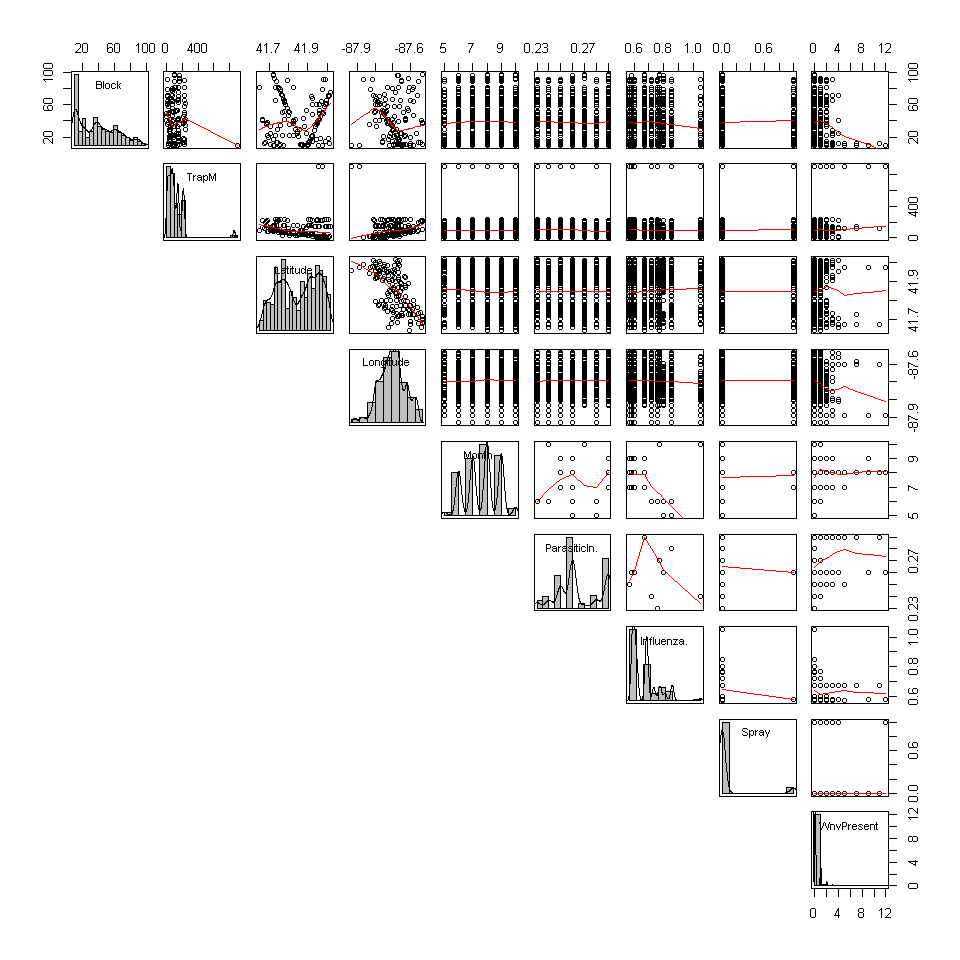

In [5]:
### a better representation of pairs
#png('pair1.png')

options(repr.plot.width = 8, repr.plot.height = 8)

pairs(sub1ff, 
      upper.panel = panel.smooth,
      diag.panel = panel.hist, 
      lower.panel = NULL,
      cex=0.8)


# make plot
#dev.off()

In [7]:
colnames(ffWNV2)

[1] "Date"                   "ID"                     "Month_Yr"              
 [4] "Address"                "Block"                  "Trap"                  
 [7] "Latitude"               "Longitude"              "Street"                
[10] "CULEX_ERRATICUS"        "CULEX_PIPIENS"          "CULEX_PIPIENS_RESTUANS"
[13] "CULEX_RESTUANS"         "CULEX_SALINARIUS"       "CULEX_TARSALIS"        
[16] "CULEX_TERRITANS"        "WnvPresent"             "Month"                 
[19] "Tmax"                   "Tmin"                   "Tavg"                  
[22] "Depart"                 "DewPoint"               "WetBulb"               
[25] "Heat"                   "Cool"                   "Sunrise"               
[28] "Sunset"                 "SnowFall"               "PrecipTotal"           
[31] "StnPressure"            "SeaLevel"               "ResultSpeed"           
[34] "ResultDir"              "AvgSpeed"               "BR"                    
[37] "DZ"                     "FG"                     "HZ"                    
[40] "RA"                     "TS"                     "TSRA"                  
[43] "VCTS"                   "Tmax2"                  "Tmin2"                 
[46] "Tavg2"                  "DewPoint2"              "WetBulb2"              
[49] "Heat2"                  "Cool2"                  "PrecipTotal2"          
[52] "StnPressure2"           "SeaLevel2"              "ResultSpeed2"          
[55] "ResultDir2"             "AvgSpeed2"              "BR2"                   
[58] "DZ2"                    "FG2"                    "HZ2"                   
[61] "RA2"                    "TS2"                    "TSRA2"                 
[64] "VCTS2"                  "ParasiticIn."           "Influenza."            
[67] "Spray"

Comparison between weather station 1 & 2

In [6]:
var3 <- c('Tmax', 'Tmin', 'Tavg', 'Depart', 'DewPoint', 'WetBulb', 'Heat', 'Cool','Tmax2', 'Tmin2', 'Tavg2', 'DewPoint2', 'WetBulb2', 'Heat2', 'Cool2',  'WnvPresent' )
sub3ff <- ffWNV2[var3]

png 
  3

jpeg 
   5

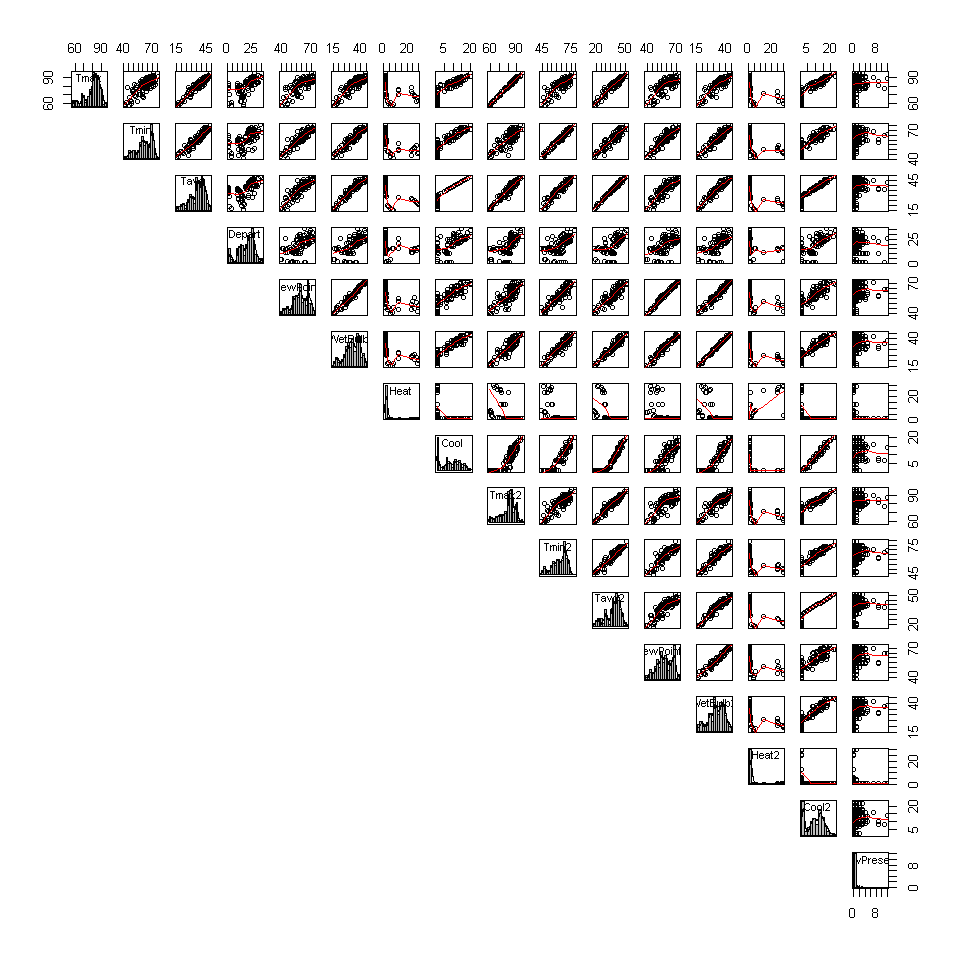

In [19]:
### a better representation of pairs
options(repr.plot.width = 8, repr.plot.height = 8)

pairs(sub3ff, 
      upper.panel = panel.smooth,
      diag.panel = panel.hist, 
      lower.panel = NULL,
      cex=0.8)

dev.copy(png, filename="plot2.jpg");
dev.off ();

In [7]:
res1 <- rcorr(as.matrix(sub3ff), type="pearson")
res1

#write.csv(file=fileName, x=Fail)

            Tmax  Tmin  Tavg Depart DewPoint WetBulb  Heat  Cool Tmax2 Tmin2
Tmax        1.00  0.75  0.94   0.64     0.76    0.86 -0.53  0.86  0.99  0.80
Tmin        0.75  1.00  0.93   0.54     0.91    0.93 -0.60  0.90  0.77  0.98
Tavg        0.94  0.93  1.00   0.64     0.88    0.96 -0.60  0.94  0.95  0.95
Depart      0.64  0.54  0.64   1.00     0.63    0.65 -0.25  0.68  0.65  0.57
DewPoint    0.76  0.91  0.88   0.63     1.00    0.98 -0.53  0.85  0.78  0.90
WetBulb     0.86  0.93  0.96   0.65     0.98    1.00 -0.57  0.91  0.88  0.94
Heat       -0.53 -0.60 -0.60  -0.25    -0.53   -0.57  1.00 -0.51 -0.54 -0.62
Cool        0.86  0.90  0.94   0.68     0.85    0.91 -0.51  1.00  0.87  0.90
Tmax2       0.99  0.77  0.95   0.65     0.78    0.88 -0.54  0.87  1.00  0.82
Tmin2       0.80  0.98  0.95   0.57     0.90    0.94 -0.62  0.90  0.82  1.00
Tavg2       0.95  0.91  0.99   0.64     0.87    0.95 -0.61  0.93  0.96  0.95
DewPoint2   0.74  0.91  0.88   0.63     0.99    0.97 -0.52  0.85  0.76  0.90

In [17]:
str(res1)

List of 3
 $ r: num [1:16, 1:16] 1 0.752 0.942 0.642 0.757 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:16] "Tmax" "Tmin" "Tavg" "Depart" ...
  .. ..$ : chr [1:16] "Tmax" "Tmin" "Tavg" "Depart" ...
 $ n: int [1:16, 1:16] 4616 4616 4616 4616 4616 4569 4616 4616 4616 4616 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:16] "Tmax" "Tmin" "Tavg" "Depart" ...
  .. ..$ : chr [1:16] "Tmax" "Tmin" "Tavg" "Depart" ...
 $ P: num [1:16, 1:16] NA 0 0 0 0 0 0 0 0 0 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:16] "Tmax" "Tmin" "Tavg" "Depart" ...
  .. ..$ : chr [1:16] "Tmax" "Tmin" "Tavg" "Depart" ...
 - attr(*, "class")= chr "rcorr"


In [18]:
 df.res1.r=data.frame(res1$r)

In [21]:
res1$r

,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Tmax2,Tmin2,Tavg2,DewPoint2,WetBulb2,Heat2,Cool2,WnvPresent
Tmax,1.00000000,0.7524730,0.94158058,0.64233770,0.7567720,0.8631607,-0.53206778,0.86093158,0.99232474,0.80484222,0.94687243,0.74023454,0.86758009,-0.55573624,0.88436796,0.07383132
Tmin,0.75247300,1.0000000,0.92937778,0.54492823,0.9081905,0.9326422,-0.60052845,0.89516044,0.76920521,0.97608481,0.90512004,0.90916775,0.93040798,-0.52712950,0.87375366,0.09804110
Tavg,0.94158058,0.9293778,1.00000000,0.63588105,0.8837344,0.9567803,-0.59811345,0.93817894,0.94589375,0.94692691,0.98975793,0.87606969,0.95826939,-0.57528780,0.93942570,0.09202079
Depart,0.64233770,0.5449282,0.63588105,1.00000000,0.6263589,0.6464594,-0.24549618,0.67662572,0.65274888,0.56656892,0.63804212,0.62508832,0.65070765,-0.27508982,0.67887167,0.02779605
DewPoint,0.75677199,0.9081905,0.88373440,0.62635893,1.0000000,0.9775058,-0.53049620,0.85100664,0.77744988,0.89949957,0.87387470,0.98950887,0.97086718,-0.49052709,0.84224676,0.10401154
WetBulb,0.86316067,0.9326422,0.95678033,0.64645936,0.9775058,1.0000000,-0.57402490,0.91026042,0.87838124,0.94108965,0.95013147,0.96717448,0.99500554,-0.55333914,0.90876245,0.10251374
Heat,-0.53206778,-0.6005285,-0.59811345,-0.24549618,-0.5304962,-0.5740249,1.00000000,-0.51051445,-0.53932271,-0.61836007,-0.60723079,-0.52401131,-0.57606296,0.83947715,-0.54245487,-0.07293475
Cool,0.86093158,0.8951604,0.93817894,0.67662572,0.8510066,0.9102604,-0.51051445,1.00000000,0.87238052,0.90340689,0.92702027,0.85113540,0.91192263,-0.44548149,0.98319976,0.08854385
Tmax2,0.99232474,0.7692052,0.94589375,0.65274888,0.7774499,0.8783812,-0.53932271,0.87238052,1.00000000,0.82180161,0.96015030,0.75935666,0.88180308,-0.56194024,0.90453082,0.06743334
Tmin2,0.80484222,0.9760848,0.94692691,0.56656892,0.8994996,0.9410896,-0.61836007,0.90340689,0.82180161,1.00000000,0.94727255,0.89563551,0.93998871,-0.55936083,0.91138844,0.09742414


In [23]:
write.csv(res1$r, file="C:/Users/Chen/Project/data/res1.csv", row.names =F)

Redundant varible between weather station 1 & 2:
a. SeaLevel, SeaLevel2, StnPressure, StnPressure2 (StnPressure2 has 47 missing) -I'll keep StnPressure2.
b. ResultSpeed , ResultSpeed2 -I'll keep ResultSpeed
c. WetBulb, WetBulb2 (WetBulb has 47 missing) -I'll keep WetBulb2
d. ResultSpeed, ResultSpeed2 -I'll keep ResultSpeed
e. DewPoint, DewPoint2 -I'll keep DewPoint
f. Cool, Cool2 -I'll keep Cool

In [20]:
var4 <- c('PrecipTotal', 'StnPressure', 'SeaLevel', 'ResultSpeed', 'ResultDir', 'AvgSpeed', 'PrecipTotal2', 'StnPressure2', 'SeaLevel2', 'ResultSpeed2', 'ResultDir2', 'AvgSpeed2','WnvPresent' )
sub4ff <- ffWNV2[var4]

png 
  3

jpeg 
   5

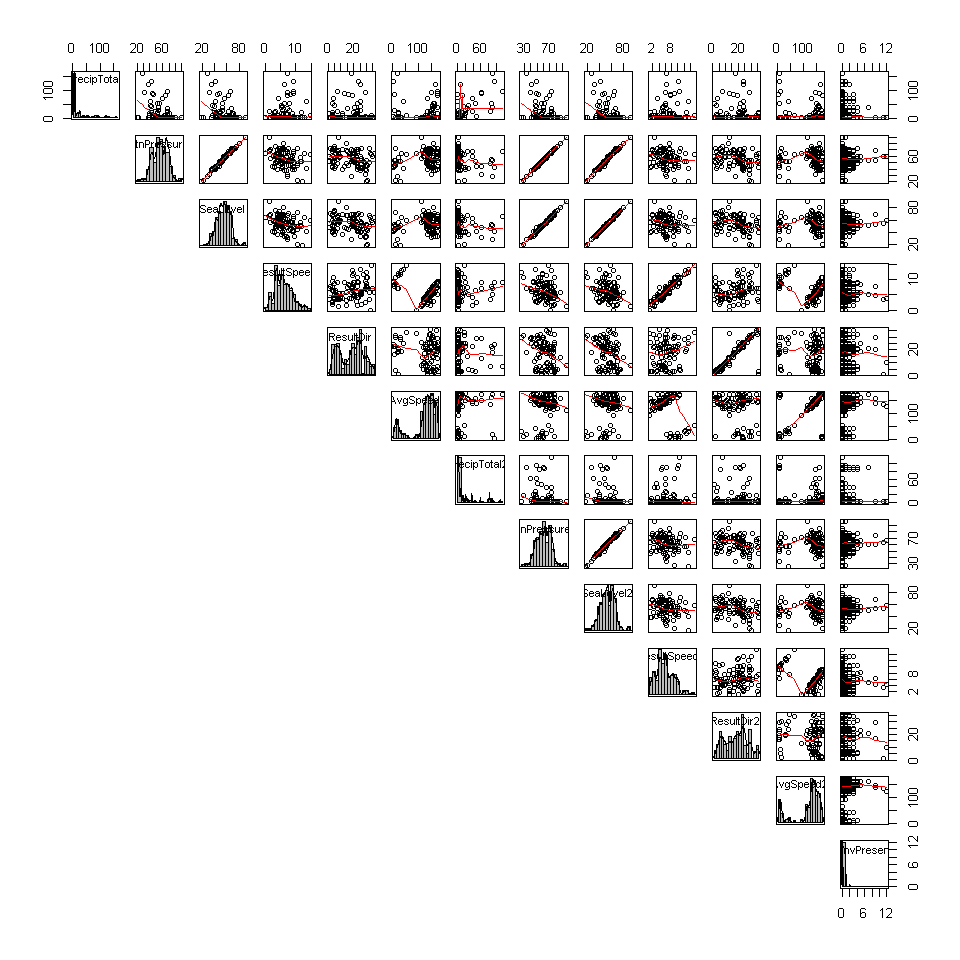

In [21]:
### a better representation of pairs
options(repr.plot.width = 8, repr.plot.height = 8)

pairs(sub4ff, 
      upper.panel = panel.smooth,
      diag.panel = panel.hist, 
      lower.panel = NULL,
      cex=0.8)

dev.copy(png, filename="plot3.jpg");
dev.off ();

In [19]:
res1 <- rcorr(as.matrix(sub4ff), type="pearson")
res1

             PrecipTotal StnPressure SeaLevel ResultSpeed ResultDir AvgSpeed
PrecipTotal         1.00       -0.43    -0.41        0.21      0.04    -0.15
StnPressure        -0.43        1.00     0.99       -0.36     -0.28     0.20
SeaLevel           -0.41        0.99     1.00       -0.34     -0.27     0.16
ResultSpeed         0.21       -0.36    -0.34        1.00      0.27    -0.38
ResultDir           0.04       -0.28    -0.27        0.27      1.00    -0.19
AvgSpeed           -0.15        0.20     0.16       -0.38     -0.19     1.00
PrecipTotal2        0.63       -0.27    -0.25        0.07     -0.05    -0.01
StnPressure2       -0.42        1.00     0.99       -0.35     -0.26     0.17
SeaLevel2          -0.40        0.99     1.00       -0.33     -0.26     0.16
ResultSpeed2        0.23       -0.28    -0.27        0.94      0.16    -0.35
ResultDir2          0.04       -0.33    -0.32        0.26      0.86    -0.19
AvgSpeed2          -0.25        0.09     0.06       -0.40     -0.08     0.62

looking into varibles from weather station 1

In [27]:
var5 <- c('Tmax', 'Tmin', 'Tavg', 'Depart' ,'DewPoint' ,'WetBulb' ,'Heat', 'Cool', 'Sunrise', 'Sunset' ,'SnowFall', 'PrecipTotal', 'StnPressure' ,'SeaLevel', 'ResultSpeed', 'ResultDir', 'AvgSpeed' )
sub5ff <- ffWNV2[var5]

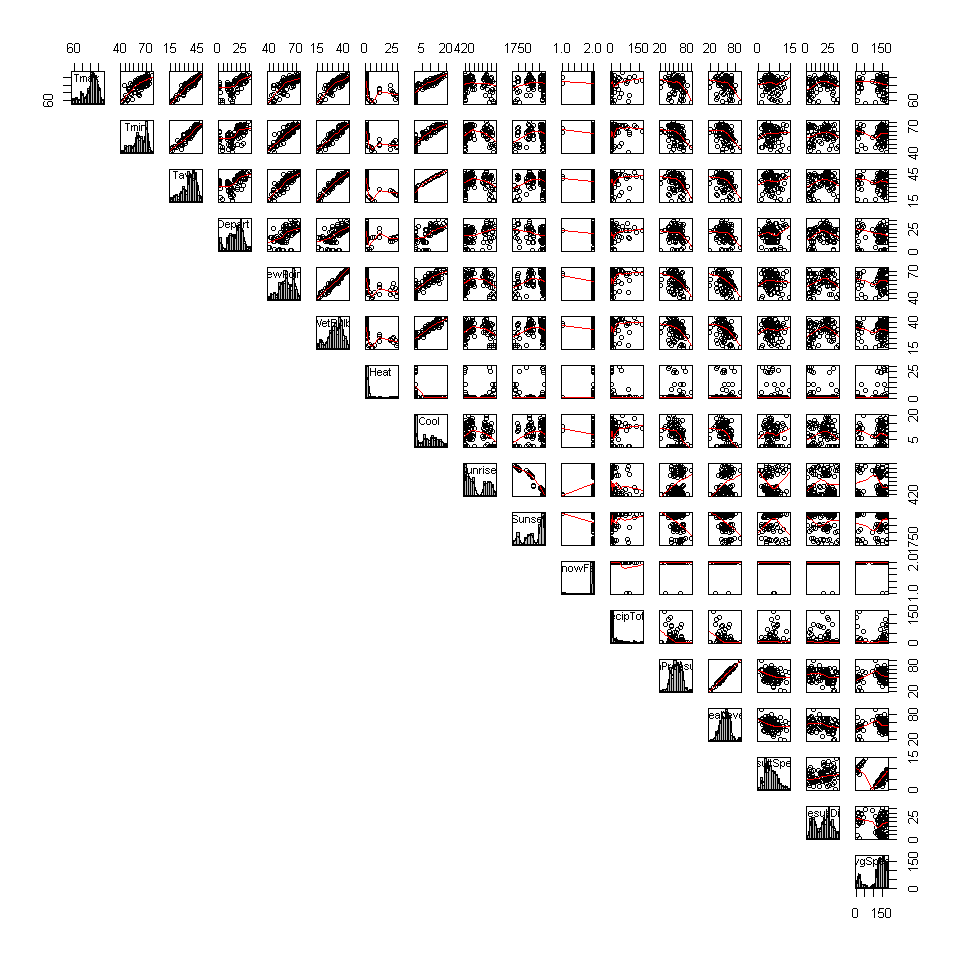

In [17]:
### a better representation of pairs
options(repr.plot.width = 8, repr.plot.height = 8)

pairs(sub5ff, 
      upper.panel = panel.smooth,
      diag.panel = panel.hist, 
      lower.panel = NULL,
      cex=0.8)

In [21]:
describe(sub5ff)

sub5ff 

 17  Variables      4616  Observations
--------------------------------------------------------------------------------
Tmax 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
    4616        0       33    0.997    80.82    9.377       62       68 
     .25      .50      .75      .90      .95 
      77       83       87       90       92 

lowest : 57 58 59 60 61, highest: 90 91 92 93 96
--------------------------------------------------------------------------------
Tmin 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
    4616        0       33    0.996    61.66    8.935       46       49 
     .25      .50      .75      .90      .95 
      57       63       69       71       71 

lowest : 41 43 44 45 46, highest: 70 71 72 73 76
--------------------------------------------------------------------------------
Tavg 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
    4616        0       31    0.997    36.

In [25]:
var6 <- c('Tmax', 'Tmin', 'Tavg', 'Depart' ,'DewPoint' ,'Heat', 'Cool', 'Sunrise', 'Sunset' ,'SnowFall', 'PrecipTotal' ,'SeaLevel', 'ResultSpeed', 'ResultDir', 'AvgSpeed' )
sub6ff <- ffWNV2[var6]

In [38]:
var6 <- c('Tmax', 'Tmin', 'Tavg', 'Depart' ,'DewPoint', 'WetBulb', 'Sunrise', 'Sunset' , 'PrecipTotal','StnPressure', 'SeaLevel', 'ResultSpeed', 'ResultDir', 'AvgSpeed' )
sub6ff <- ffWNV2[var6]

In [39]:
res1 <- rcorr(as.matrix(sub6ff), type="pearson")
res1

             Tmax  Tmin  Tavg Depart DewPoint WetBulb Sunrise Sunset
Tmax         1.00  0.75  0.94   0.64     0.76    0.86   -0.11   0.21
Tmin         0.75  1.00  0.93   0.54     0.91    0.93   -0.19   0.29
Tavg         0.94  0.93  1.00   0.64     0.88    0.96   -0.16   0.26
Depart       0.64  0.54  0.64   1.00     0.63    0.65    0.35  -0.31
DewPoint     0.76  0.91  0.88   0.63     1.00    0.98   -0.10   0.20
WetBulb      0.86  0.93  0.96   0.65     0.98    1.00   -0.13   0.23
Sunrise     -0.11 -0.19 -0.16   0.35    -0.10   -0.13    1.00  -0.96
Sunset       0.21  0.29  0.26  -0.31     0.20    0.23   -0.96   1.00
PrecipTotal  0.12  0.29  0.22   0.21     0.43    0.36   -0.17   0.16
StnPressure -0.28 -0.40 -0.36  -0.21    -0.45   -0.41    0.34  -0.37
SeaLevel    -0.29 -0.43 -0.39  -0.23    -0.46   -0.43    0.36  -0.38
ResultSpeed -0.01  0.07  0.03   0.00     0.02    0.01   -0.14   0.09
ResultDir    0.18  0.13  0.16   0.19     0.13    0.16    0.08  -0.04
AvgSpeed    -0.13 -0.09 -0.12  -0.

Redundant varible within station 1 : SeaLevel (I will keep StnPressure)

In [42]:
ffWNV4<-ffWNV2
dim(ffWNV4)

[1] 4616   67

In [43]:
ffWNV4$SeaLevel   <-NULL 
ffWNV4$SeaLevel2   <-NULL 
ffWNV4$StnPressure   <-NULL 
ffWNV4$ResultSpeed2   <-NULL 
ffWNV4$WetBulb   <-NULL 
ffWNV4$ResultSpeed2   <-NULL 
ffWNV4$DewPoint2   <-NULL 
ffWNV4$Cool2   <-NULL

In [45]:
str(ffWNV4)

'data.frame':	4616 obs. of  60 variables:
 $ Date                  : Factor w/ 95 levels "01/08/2007","01/08/2013",..: 88 88 88 88 88 88 88 88 88 88 ...
 $ ID                    : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Month_Yr              : Factor w/ 20 levels "2007-05","2007-06",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Address               : Factor w/ 138 levels "1000 East 67th Street, Chicago, IL 60637, USA",..: 6 8 10 14 16 19 26 28 29 32 ...
 $ Block                 : int  11 11 11 15 15 17 21 22 22 22 ...
 $ Trap                  : Factor w/ 136 levels "T001","T002",..: 36 70 37 100 33 72 38 40 66 75 ...
 $ Latitude              : num  41.9 41.9 41.9 41.9 41.9 ...
 $ Longitude             : num  -87.7 -87.6 -87.7 -87.8 -87.7 ...
 $ Street                : Factor w/ 128 levels "  W ARMITAGE AVENUE",..: 124 75 108 27 128 103 42 18 88 102 ...
 $ CULEX_ERRATICUS       : int  0 0 0 0 0 0 0 0 0 0 ...
 $ CULEX_PIPIENS         : int  0 0 0 0 0 0 0 0 0 1 ...
 $ CULEX_PIPIENS_RESTUANS: int  1 0 0 0 0 0 

In [53]:
ffWNV4$BR<-factor(ffWNV4$BR) 
ffWNV4$BR2 <-factor(ffWNV4$BR2)
ffWNV4$DZ <-factor(ffWNV4$DZ)
ffWNV4$DZ2 <-factor(ffWNV4$DZ2)
ffWNV4$FG <-factor(ffWNV4$FG)
ffWNV4$FG2 <-factor(ffWNV4$FG2)
ffWNV4$RA <-factor(ffWNV4$RA)
ffWNV4$RA2 <-factor(ffWNV4$RA2)
ffWNV4$TS <-factor(ffWNV4$TS)
ffWNV4$TS2 <-factor(ffWNV4$TS2)
ffWNV4$FG <-factor(ffWNV4$FG)
ffWNV4$FG2 <-factor(ffWNV4$FG2)
ffWNV4$TSRA <-factor(ffWNV4$TSRA)
ffWNV4$TSRA2 <-factor(ffWNV4$TSRA2)
ffWNV4$VCTS <-factor(ffWNV4$VCTS)
ffWNV4$VCTS2 <-factor(ffWNV4$VCTS2)

In [54]:
options(repr.plot.width = 3, repr.plot.height = 3)
boxplot(ffWNV4$BR~ffWNV4$BR2)
boxplot(ffWNV4$DZ~ffWNV4$DZ2)
boxplot(ffWNV4$FG~ffWNV4$FG2)
boxplot(ffWNV4$RA~ffWNV4$RA2)
boxplot(ffWNV4$TS~ffWNV4$TS2)
boxplot(ffWNV4$FG~ffWNV4$FG2)
boxplot(ffWNV4$TSRA~ffWNV4$TSRA2)
boxplot(ffWNV4$VCTS~ffWNV4$VCTS2)

ERROR: Error in oldClass(stats) <- cl: adding class "factor" to an invalid object


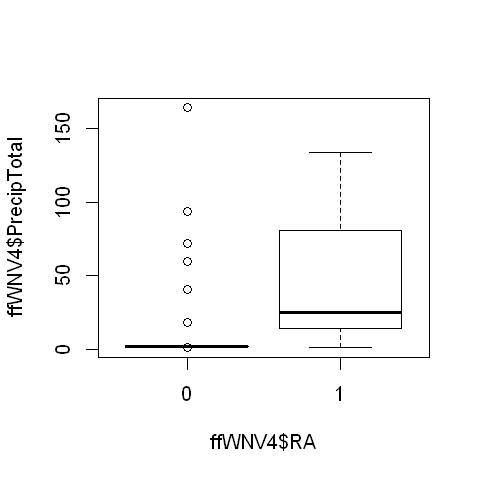

In [58]:
options(repr.plot.width = 4, repr.plot.height = 4)
plot(ffWNV4$PrecipTotal ~ ffWNV4$RA)

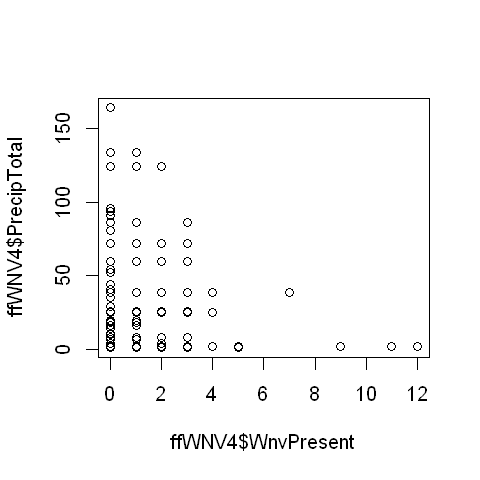

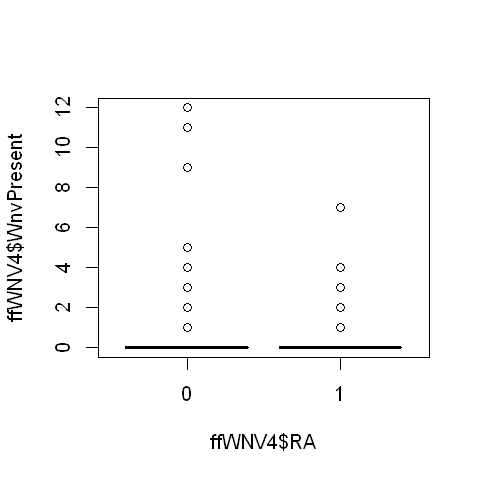

In [63]:
plot(ffWNV4$PrecipTotal ~ ffWNV4$WnvPresent )
plot(ffWNV4$WnvPresent  ~ ffWNV4$RA)

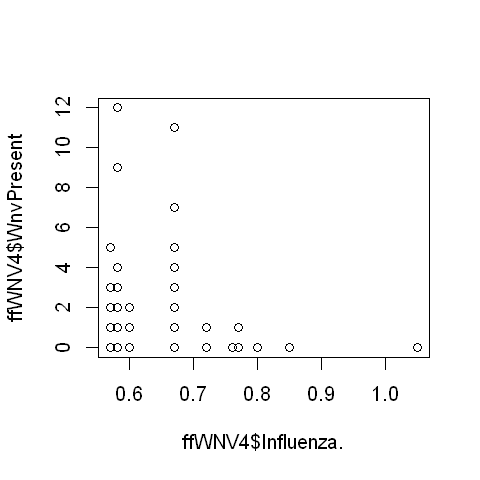

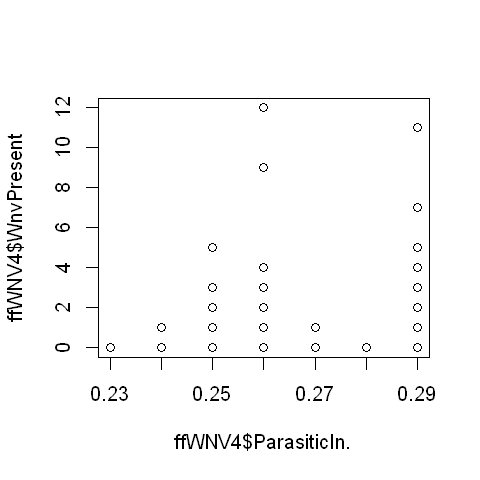

In [65]:
plot(ffWNV4$Influenza. , ffWNV4$WnvPresent )
plot(ffWNV4$ParasiticIn. , ffWNV4$WnvPresent )

In [67]:
ffWNV4$Spray<-factor(ffWNV4$Spray)

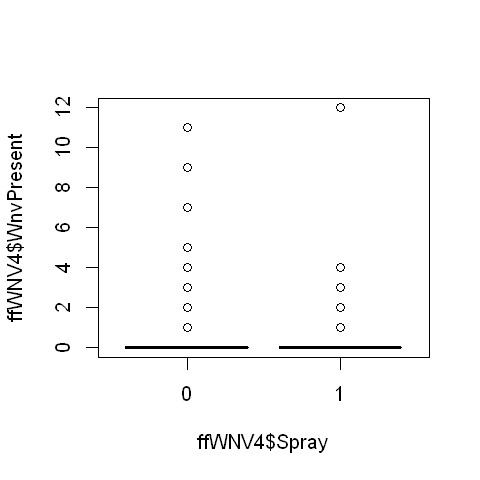

In [70]:
plot(ffWNV4$WnvPresent ~ ffWNV4$Spray)

In [ ]:
plot(wea1$AvgSpeed, type = "o",)  ## index plot with one variable
lines(wea2$AvgSpeed2, type = "o", lty = 2, col = "red")  ## add another variable